# Import Modules
Import libraries required for ETL and Feature Selection

In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(42)

import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, minmax_scale, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer

# Method Definitions

## Plot Histogram Method

In [2]:
# Code referenced from RealPython example:  https://realpython.com/python-histograms/
def plotHistogram(xValues, lbl):
    n, bins, patches = plt.hist(x=xValues, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(lbl)
    plt.ylabel('Frequency')
    plt.title(lbl + ' Histogram')
    maxfreq = n.max()

    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [3]:
# Code to prep X and y
def prepData(data, scaler):
    
    # drop the dependent column from the independent columns
    X = data.drop(dependent, axis=1)
    
    # set the dependent column to y
    y = data[dependent]
    
    # Make a copy of the independent field matrix
    copyData = X.copy()

    # call pandas get dummies to convert to 1's and 0's in separate columns
    X = pd.get_dummies(copyData)
    
    # Split the data into test and train groups
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
    
    # Save data out for use in other Jupyter Notebooks
    X_train_csv = X_train.to_csv ('X_train.csv', index = None, header=True)
    X_test_csv = X_test.to_csv ('X_test.csv', index = None, header=True)
    y_train_csv = y_train.to_csv ('y_train.csv', index = None, header=True)
    y_test_csv = y_test.to_csv ('y_test.csv', index = None, header=True)
    

    # Apply a scalar, first train then scale test and train data
    # TO DO:  Insert function to select scalar
    X_scaler = scaler.fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Label encode the dependent variable, then Hot encode it
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    y_train_categorical = to_categorical(label_encoder.transform(y_train))
    y_test_categorical = to_categorical(label_encoder.transform(y_test))

    return X, y, X_train_scaled, X_test_scaled, y_train_categorical, y_test_categorical

# Arythmia - Cleveland Data Set
Create standard csv with header

In [4]:
######## Dependent variable (column) in our dataset ###########
# Arythmia data set:  We will use the binary sick/healthy column buff as our output and remove the 'healthy' column
dependent = 'buff'
remove = 'healthy'

# Set the original file and new file names
originalFile = 'cleve.csv'
csvFile = 'cleveland.csv'
clean_csv = 'cleveland_clean.csv'

scalers = {"Robust": RobustScaler(),
           "Standard": StandardScaler(), 
           "MinMax": MinMaxScaler(),
           "MaxAbs": MaxAbsScaler(),
           "Normalizer": Normalizer(),
           "Quantile": QuantileTransformer(),
           "Power": PowerTransformer()}


In [5]:
# Open the Cleveland original file, add a header and convert to csv
with open(originalFile) as fin, open(csvFile,'w') as fout:
    fout.write("age,sex,chestPain,trestBps,cholesterol,bloodSugar,ecg,maxHeartRate,exerciseInducedAngina,oldPeak,slope,vesselsColored,thal,buff,healthy\n")
    for line in fin:
        fout.write( ",".join(line.split()) + "\n" )

### Describe the data and look for unique values, remove bad data and any columns not needed

In [6]:
# Describe the continuous data and look for any anomalies
data = pd.read_csv(csvFile)
data.describe()

,age,trestBps,cholesterol,maxHeartRate,oldPeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [7]:
# determine column names to be able to look at all unique values for classification columns
data.columns

Index(['age', 'sex', 'chestPain', 'trestBps', 'cholesterol', 'bloodSugar',
       'ecg', 'maxHeartRate', 'exerciseInducedAngina', 'oldPeak', 'slope',
       'vesselsColored', 'thal', 'buff', 'healthy'],
      dtype='object')

In [8]:
data['sex'].value_counts()

male    207
fem      96
Name: sex, dtype: int64

In [9]:
data['chestPain'].value_counts()

asympt    143
notang     87
abnang     50
angina     23
Name: chestPain, dtype: int64

In [10]:
data['bloodSugar'].value_counts()

fal     258
true     45
Name: bloodSugar, dtype: int64

In [11]:
data['ecg'].value_counts()

norm    152
hyp     147
abn       4
Name: ecg, dtype: int64

In [12]:
data['exerciseInducedAngina'].value_counts()

fal     204
true     99
Name: exerciseInducedAngina, dtype: int64

In [13]:
data['slope'].value_counts()

up      142
flat    140
down     21
Name: slope, dtype: int64

In [14]:
data['vesselsColored'].value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
?        5
Name: vesselsColored, dtype: int64

In [15]:
# drop the data with rows where ? appear
data.drop(data[data.vesselsColored == '?'].index, inplace=True)

In [16]:
data['thal'].value_counts()

norm    163
rev     115
fix      18
?         2
Name: thal, dtype: int64

In [17]:
# drop the data with rows where ? appear
data.drop(data[data.thal == '?'].index, inplace=True)

In [18]:
data['buff'].value_counts()

buff    160
sick    136
Name: buff, dtype: int64

In [19]:
data['healthy'].value_counts()

H     160
S1     53
S2     35
S3     35
S4     13
Name: healthy, dtype: int64

In [20]:
# We determined we were discarding this column and using the binary column 'buff' instead to indicate healthy vs sick
# so delete this column
data = data.drop(remove, axis=1)

In [21]:
#display the data without ? rows
data

,age,sex,chestPain,trestBps,cholesterol,bloodSugar,ecg,maxHeartRate,exerciseInducedAngina,oldPeak,slope,vesselsColored,thal,buff
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff


## Save our cleaned data set

In [22]:
# overwrite the csv so we have a clean copy
export_csv = data.to_csv (clean_csv, index = None, header=True)

## Now plot each continuous column in a histogram to examine the distribution
These can be referenced when selecting machine learning options

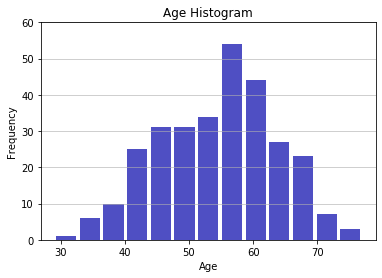

In [23]:
plotHistogram(data['age'], 'Age')

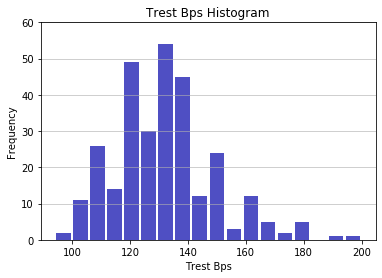

In [24]:
plotHistogram(data['trestBps'], 'Trest Bps')

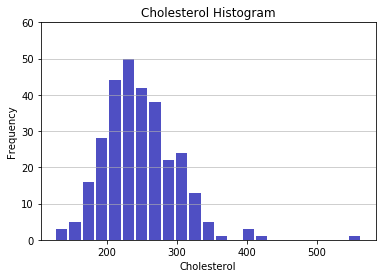

In [25]:
plotHistogram(data['cholesterol'], 'Cholesterol')

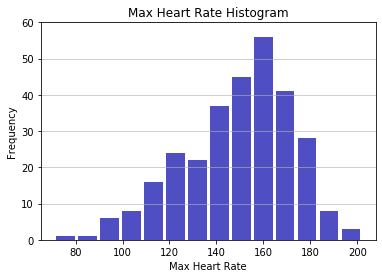

In [26]:
plotHistogram(data['maxHeartRate'], 'Max Heart Rate')

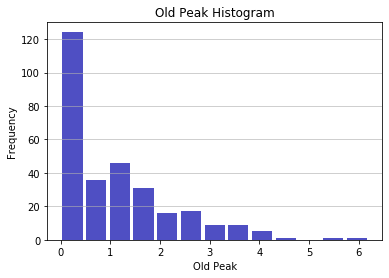

In [27]:
plotHistogram(data['oldPeak'], 'Old Peak')

# Let's Try Some Feature Selection Techniques
This is an attempt to limit the number of features used in the models to simplify and remove noise
##### NOTE:  These three methods and code were obtained from the following website:
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

## First we need to create our X and y

In [28]:
# X, y, X_train_scaled, X_test_scaled, y_train_categorical, y_test_categorical = prepData(data, scalers['MinMax'])
X, y, X_train_scaled, X_test_scaled, y_train_categorical, y_test_categorical = prepData(data, scalers['MinMax'])
X

,age,trestBps,cholesterol,maxHeartRate,oldPeak,sex_fem,sex_male,chestPain_abnang,chestPain_angina,chestPain_asympt,...,slope_down,slope_flat,slope_up,vesselsColored_0.0,vesselsColored_1.0,vesselsColored_2.0,vesselsColored_3.0,thal_fix,thal_norm,thal_rev
0,63.0,145.0,233.0,150.0,2.3,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,124.0,255.0,175.0,0.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
299,57.0,132.0,207.0,168.0,0.0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
300,49.0,118.0,149.0,126.0,0.8,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
301,74.0,120.0,269.0,121.0,0.2,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


## Univariate Selection using ChiSquare

In [29]:
# REference:  https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_scaled,y_train_categorical)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(27,'Score'))  #print best features reverse order

                         Specs      Score
27                    thal_rev  34.200294
17  exerciseInducedAngina_true  33.418728
9             chestPain_asympt  32.604218
26                   thal_norm  28.482451
21          vesselsColored_0.0  21.540903
20                    slope_up  18.872001
19                  slope_flat  15.823077
16   exerciseInducedAngina_fal  14.756322
7             chestPain_abnang  14.126050
10            chestPain_notang  13.687783
23          vesselsColored_2.0  12.695136
5                      sex_fem  12.124316
22          vesselsColored_1.0  11.352036
4                      oldPeak  10.745139
24          vesselsColored_3.0   7.004118
6                     sex_male   5.700838
13                     ecg_abn   3.529412
8             chestPain_angina   2.826471
15                    ecg_norm   2.605742
3                 maxHeartRate   1.955725
14                     ecg_hyp   1.548633
0                          age   0.975826
25                    thal_fix   0

## Feature Importance

[0.03502496 0.04442578 0.03073113 0.04561243 0.0516222  0.01905353
 0.03392827 0.00337018 0.0093416  0.13287963 0.03397756 0.0074519
 0.01069452 0.00024183 0.02261995 0.02012887 0.01899636 0.06371845
 0.01080309 0.02556698 0.04095077 0.08324723 0.04526443 0.0121062
 0.01591545 0.00653634 0.08058911 0.09520124]


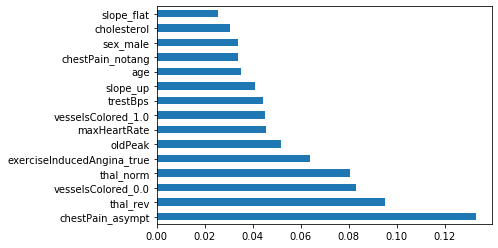

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train_categorical)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap
Notice that only continuous variables are plotted and there are no variables with a high correlation in our dataset

,age,trestBps,cholesterol,maxHeartRate,oldPeak
age,1.000000,0.288701,0.200920,-0.395989,0.199373
trestBps,0.288701,1.000000,0.126705,-0.051817,0.196793
cholesterol,0.200920,0.126705,1.000000,-0.001947,0.042144
maxHeartRate,-0.395989,-0.051817,-0.001947,1.000000,-0.346742
oldPeak,0.199373,0.196793,0.042144,-0.346742,1.000000


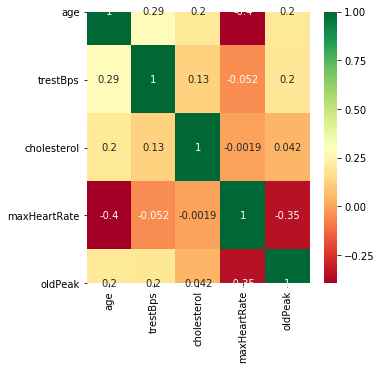

In [31]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
corrmat